<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Simple_Neural_Network_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Neural Network Exercise (Core)

Jonny Tesfahun
- 07/31/22

##Loading and Checking for Errors

In [351]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [352]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/heart - heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [354]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [355]:
df.duplicated().sum()

0

In [356]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [357]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [358]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [359]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [360]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [361]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

## Train-test split and Transform Data

In [362]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [363]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat
362,56,M,NAP,155,0,0,ST,99,N,0.0,Flat
869,59,M,NAP,150,212,1,Normal,157,N,1.6,Up
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up


In [364]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [365]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [366]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [367]:
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [368]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [369]:
preprocessing = make_column_transformer(num_tuple, cat_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5244f4e50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5244f4e90>

In [370]:
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5244f4e50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5244f4e90>

In [371]:
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [372]:
#Checking to see cat and num are transformed, looks good 
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (688, 20)




array([[ 0.23929215,  1.1838018 ,  1.3073138 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.23929215,  1.1838018 , -1.87799952, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55896789,  0.91381054,  0.09652218, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.66552646, -0.16615451,  0.47838723, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66552646,  1.02180704, -1.87799952, ...,  0.        ,
         0.        ,  1.        ],
       [-1.46564508,  0.91381054,  1.77300288, ...,  0.        ,
         1.        ,  0.        ]])

## Defining base of sequential model

In [373]:
#using X train features as input
input_shape = X_train_processed.shape[1]
input_shape

20

In [374]:
# Sequential model since this is binary classification 
model = Sequential()

In [375]:
#input layer
model.add(Dense(20, input_dim=input_shape, activation= 'relu'))

In [376]:
#second layer
model.add(Dense(10, input_dim=input_shape, activation= 'relu'))

In [377]:
#output layer
model.add(Dense(1, activation='sigmoid'))

In [378]:
#Compiling model for binary classification problem
model.compile(loss= 'bce', optimizer= 'adam')

In [379]:
#fitting model
hist = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 14ms/step - loss: 0.6351 - val_loss: 0.6101
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5608 - val_loss: 0.5487
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5029 - val_loss: 0.4965
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4558 - val_loss: 0.4503
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4203 - val_loss: 0.4166
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3937 - val_loss: 0.3889
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3751 - val_loss: 0.3725
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3622 - val_loss: 0.3571
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3521 - val_loss: 0.3543
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3434 - val_loss: 0.3398


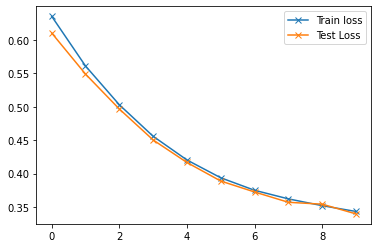

In [380]:
# Visualize the loss and evaluating model 
plt.plot(hist.history['loss'], label='Train loss', marker= 'x')
plt.plot(hist.history['val_loss'], label='Test Loss', marker= 'x')
plt.legend();

## 2nd Model 

In [381]:
Smodel = Sequential()

In [382]:
#input
Smodel.add(Dense(11, input_dim=input_shape, activation= 'relu'))
#second layer
Smodel.add(Dense(10, input_dim=input_shape, activation= 'relu'))
#output layer
Smodel.add(Dense(1, activation='sigmoid'))

In [383]:
#Compiling
Smodel.compile(loss= 'bce', optimizer= 'adam')

In [384]:
#fitting 2nd model
Shist = Smodel.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 14ms/step - loss: 0.6313 - val_loss: 0.6266
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5907 - val_loss: 0.5844
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5468 - val_loss: 0.5382
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4998 - val_loss: 0.4980
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4594 - val_loss: 0.4595
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4249 - val_loss: 0.4285
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3979 - val_loss: 0.4036
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3791 - val_loss: 0.3846
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3644 - val_loss: 0.3760
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3544 - val_loss: 0.3642


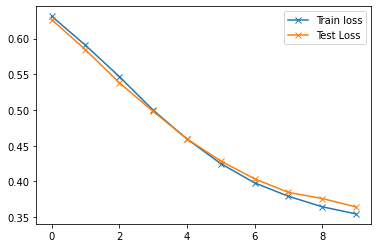

In [385]:
# Visualize the loss and evaluating 2nd model 
plt.plot(Shist.history['loss'], label='Train loss', marker= 'x')
plt.plot(Shist.history['val_loss'], label='Test Loss', marker= 'x')
plt.legend();

## 3rd Model

In [386]:
Tmodel = Sequential()

In [387]:
#input
Tmodel.add(Dense(20, input_dim=input_shape, activation= 'relu'))
#second layer
Tmodel.add(Dense(15, input_dim=input_shape, activation= 'relu'))
#third layer
Tmodel.add(Dense(10, input_dim=input_shape, activation= 'relu'))
#output layer
Tmodel.add(Dense(1, activation='sigmoid'))

In [388]:
#Compiling
Tmodel.compile(loss= 'bce', optimizer= 'adam')

In [389]:
#fitting 3rd model
Thist = Tmodel.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test),
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 13ms/step - loss: 0.7206 - val_loss: 0.6925
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6670 - val_loss: 0.6463
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6088 - val_loss: 0.5828
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5224 - val_loss: 0.4934
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4280 - val_loss: 0.4112
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3734 - val_loss: 0.3800
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3495 - val_loss: 0.3673
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3387 - val_loss: 0.3603
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3297 - val_loss: 0.3515
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3226 - val_loss: 0.3504


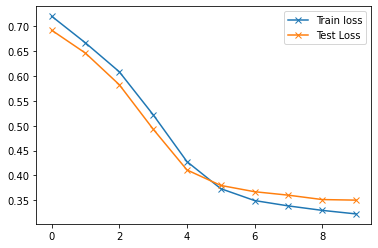

In [390]:
# Visualize the loss and evaluating 3rd model 
plt.plot(Thist.history['loss'], label='Train loss', marker= 'x')
plt.plot(Thist.history['val_loss'], label='Test Loss', marker= 'x')
plt.legend();